# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025 - 2**<br>

# <h1><center>Tablas de notas de enseñanza media </center></h1>

**Integrantes del Proyecto:** Constanza Alarcón, Carla Espinoza, Gaspar Galaz, Renato Reyes.

**Nombre del Profesor**: Rodrigo A. Carrasco.

**Fecha de Segunda Entrega**: 21 de octubre de 2025.

### Librerias

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
import copy
import numpy as np

**Lectura de archivos**

In [4]:
df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
df21 = pd.read_csv(os.path.join("Datos_rendimiento", "20220302_Rendimiento_2021_20220131_WEB.csv"), encoding="utf-8", sep=";")
df20 = pd.read_csv(os.path.join("Datos_rendimiento", "20210223_Rendimiento_2020_20210131_WEB.csv"), encoding="utf-8", sep=";")
df19 = pd.read_csv(os.path.join("Datos_rendimiento", "20200220_Rendimiento_2019_20200131_PUBL.csv"), encoding="utf-8", sep=";")
df18 = pd.read_csv(os.path.join("Datos_rendimiento", "20190220_Rendimiento_2018_20190131_PUBL.csv"), encoding="utf-8", sep=";")
df17 = pd.read_csv(os.path.join("Datos_rendimiento", "20180213_Rendimiento_2017_20180131_PUBL.csv"), encoding="utf-8", sep=";")
df16 = pd.read_csv(os.path.join("Datos_rendimiento", "20170216_Rendimiento_2016_20170131_PUBL.csv"), encoding="utf-8", sep=";")
df16.columns = df16.columns.str.upper()
df17.columns = df17.columns.str.upper()



C:\Users\renat\AppData\Local\Temp\ipykernel_14976\3618397829.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_14976\3618397829.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_14976\3618397829.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_14976\3618397829.py:4: DtypeWarning: Columns (25) have mixed type

**Limpieza y filtrado de datos**

In [5]:
df = pd.concat([df16, df17, df18, df19, df20, df21, df22, df23, df24])
df_correlaciones = copy.deepcopy(df)
df_correlaciones = df_correlaciones[['AGNO', 'COD_DEPE2', 'RURAL_RBD', 'COD_ENSE2','PROM_GRAL']]
df_correlaciones["PROM_GRAL"] = df_correlaciones["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df = df[["AGNO", "PROM_GRAL", "COD_ENSE2", "COD_GRADO", "COD_DEPE2", "COD_REG_RBD", "NOM_COM_RBD"]]
df["PROM_GRAL"] = df["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df_tec = df[df['COD_ENSE2'] == 7]
df_hc = copy.deepcopy(df)
df = df[df["COD_ENSE2"] == 5]
df = df[df["PROM_GRAL"] != 0]

In [6]:
df_pri = df[df["COD_GRADO"] == 1]
df_sec = df[df["COD_GRADO"] == 2]
df_ter = df[df["COD_GRADO"] == 3]
df_cua = df[df["COD_GRADO"] == 4]

df_municipal = df[df["COD_DEPE2"] == 1]
df_subencionado = df[df["COD_DEPE2"] == 2]
df_particular = df[df["COD_DEPE2"] == 3]

df_rm = df[df["COD_REG_RBD"] == 13]
df24_RM = df_rm[df_rm["AGNO"] == 2024]

In [7]:
df24_RM["NOM_COM_RBD"].value_counts()

NOM_COM_RBD
SANTIAGO               24096
MAIPÚ                  23846
PUENTE ALTO            22506
LA FLORIDA             17214
SAN BERNARDO           12909
LAS CONDES             12375
ÑUÑOA                  11033
PROVIDENCIA            10533
QUILICURA              10351
COLINA                  9553
PEÑALOLÉN               8420
LA CISTERNA             7866
RECOLETA                7269
EL BOSQUE               6708
SAN MIGUEL              6325
MELIPILLA               6024
VITACURA                5675
LA REINA                5515
TALAGANTE               5430
LO BARNECHEA            5389
BUIN                    4942
QUINTA NORMAL           4871
PUDAHUEL                4639
ESTACIÓN CENTRAL        4531
RENCA                   4438
LAMPA                   4391
INDEPENDENCIA           4357
LA PINTANA              4210
PAINE                   4036
PEÑAFLOR                3816
HUECHURABA              3084
MACUL                   3041
LA GRANJA               2921
SAN RAMÓN               2813
PA

Tablas: __Promedio general por grado__

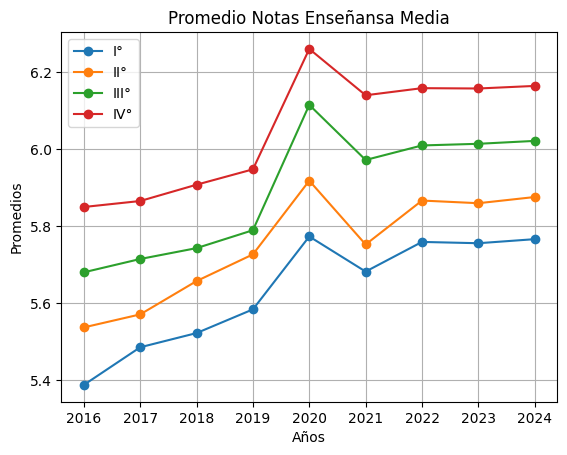

In [8]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

promedios1 = []
for i in range(9):
    promedios1.append(df_pri[df_pri["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios2 = []
for i in range(9):
    promedios2.append(df_sec[df_sec["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios3 = []
for i in range(9):
    promedios3.append(df_ter[df_ter["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios4 = []
for i in range(9):
    promedios4.append(df_cua[df_cua["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

plt.plot(años, promedios1, marker='o', label='I°')
plt.plot(años, promedios2, marker='o', label='II°')
plt.plot(años, promedios3, marker='o', label='III°')
plt.plot(años, promedios4, marker='o', label='IV°')
plt.legend()
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas Enseñansa Media")
plt.grid(True)
plt.show()

Tablas: __Tipo de establecimiento__

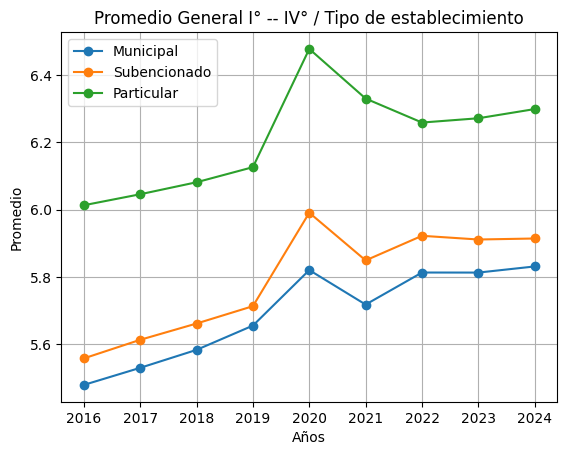

In [9]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios_m = []
for i in range(9):
    promedios_m.append(df_municipal[df_municipal["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_ps = []
for i in range(9):
    promedios_ps.append(df_subencionado[df_subencionado["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_pp = []
for i in range(9):
    promedios_pp.append(df_particular[df_particular["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

plt.plot(años, promedios_m, marker='o', label='Municipal')
plt.plot(años, promedios_ps, marker='o', label='Subencionado')
plt.plot(años, promedios_pp, marker='o', label='Particular')
plt.title("Promedio General I° -- IV° / Tipo de establecimiento")
plt.ylabel("Promedio")
plt.xlabel("Años")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()



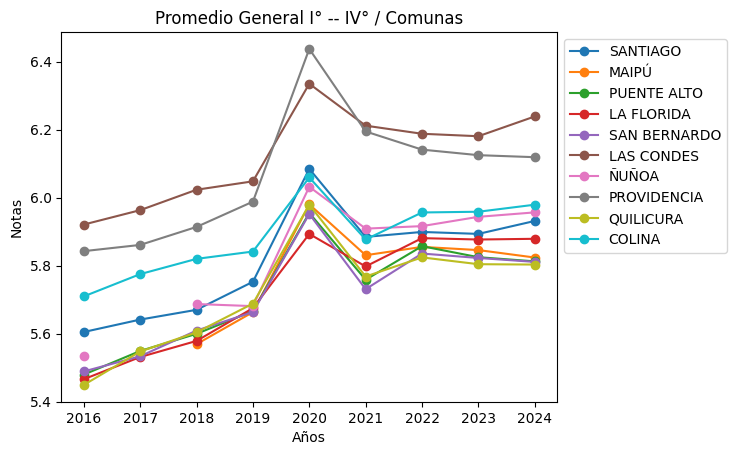

In [10]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
comunas = ["SANTIAGO", "MAIPÚ", "PUENTE ALTO", "LA FLORIDA", "SAN BERNARDO", "LAS CONDES", "ÑUÑOA", "PROVIDENCIA", "QUILICURA", "COLINA"]
promedios_c = []
for comuna in comunas:
    x = []
    df_c = df_rm[df_rm["NOM_COM_RBD"] == comuna]
    for i in range(9):
        x.append(df_c[df_c["AGNO"] == 2016 + i]["PROM_GRAL"].mean())
    plt.plot(años, x, marker='o', label=comuna)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Promedio General I° -- IV° / Comunas")
plt.ylabel("Notas")
plt.xlabel("Años")
plt.show()


In [11]:
dt = df24_RM["NOM_COM_RBD"].value_counts()
dt = pd.DataFrame(dt)
dt.reset_index(inplace=True)
dt.columns = ['Comuna', 'Cantidad de Establecimientos']
dt.head()

,Comuna,Cantidad de Establecimientos
0,SANTIAGO,24096
1,MAIPÚ,23846
2,PUENTE ALTO,22506
3,LA FLORIDA,17214
4,SAN BERNARDO,12909


In [12]:
gdf = gpd.read_file('Comunas/comunas.shp')
gdf = gdf[gdf['codregion'] == 13]
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 26 to 328
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    52 non-null     int64   
 1   shape_leng  52 non-null     float64 
 2   dis_elec    52 non-null     int32   
 3   cir_sena    52 non-null     int32   
 4   cod_comuna  52 non-null     int32   
 5   codregion   52 non-null     int32   
 6   st_area_sh  52 non-null     float64 
 7   st_length_  52 non-null     float64 
 8   Region      52 non-null     object  
 9   Comuna      52 non-null     object  
 10  Provincia   52 non-null     object  
 11  geometry    52 non-null     geometry
dtypes: float64(3), geometry(1), int32(4), int64(1), object(3)
memory usage: 4.5+ KB


In [13]:
dt['Comuna'] = dt['Comuna'].str.lower()
gdf['Comuna'] = gdf['Comuna'].str.lower()
merged = pd.merge(dt, gdf, on='Comuna')
merged = gpd.GeoDataFrame(merged)
merged.head()

,Comuna,Cantidad de Establecimientos,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Provincia,geometry
0,santiago,24096,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220...."
1,maipú,23846,320,61424.982526,8,7,13119,13,1.990876e+08,73734.913427,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7877529.505 -3956422.697, -7877529...."
2,puente alto,22506,292,48961.654840,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478...."
3,la florida,17214,311,49696.426793,12,7,13110,13,1.025245e+08,59570.561221,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7841285.109 -3960800.595, -7841150...."
4,san bernardo,12909,297,86349.611516,14,7,13401,13,2.227586e+08,103993.594041,Región Metropolitana de Santiago,Maipo,"POLYGON ((-7874973.895 -3983668.273, -7874938...."


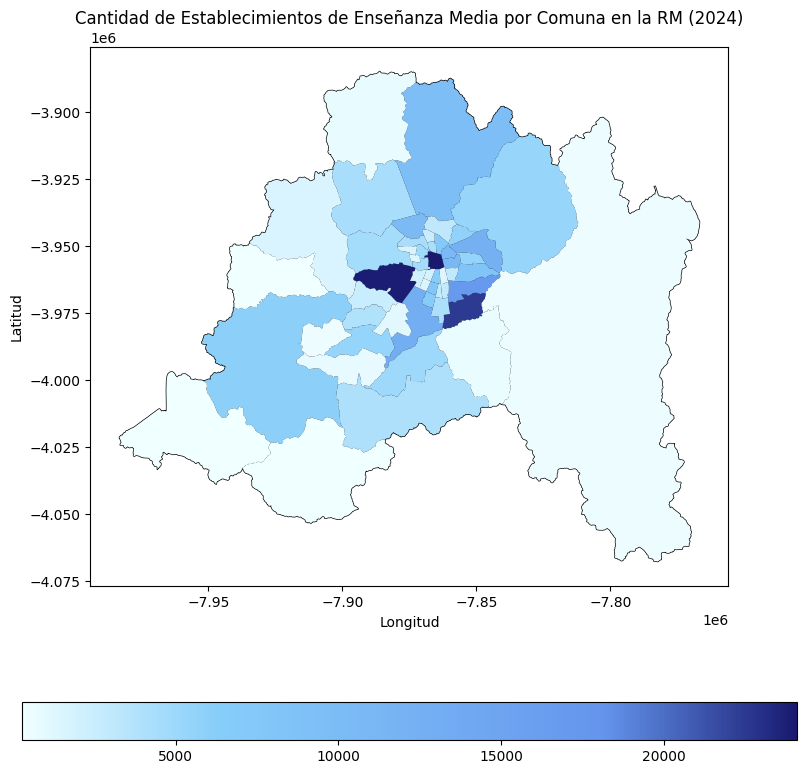

In [14]:
import matplotlib.colors as mcolors
colors = ["azure", "lightskyblue", "cornflowerblue", "midnightblue"]
positions = [0, 0.25,0.75, 1]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("cyclic_cmap", list(zip(positions, colors)))

ax = gdf.plot(figsize=(10, 10), color='white', edgecolor='black')
merged.plot(column='Cantidad de Establecimientos', ax=ax, cmap=custom_cmap, legend=True, legend_kwds={'orientation': "horizontal"})
plt.title("Cantidad de Establecimientos de Enseñanza Media por Comuna en la RM (2024)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

# Comparaciones por tipo de enseñanza (Tecnicos o Cientificos/Humanistas)

## Grafico lineal 2016 - 2024

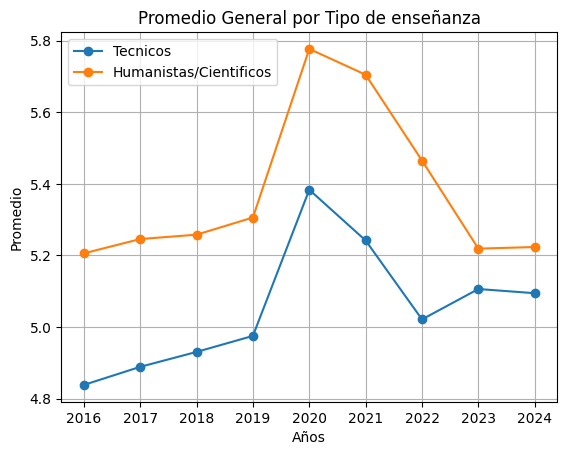

In [15]:
promedios_tec = []
for i in range(9):
    promedios_tec.append(df_tec[df_tec["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_hc = []
for i in range(9):
    promedios_hc.append(df_hc[df_hc["AGNO"] == 2016 + i]["PROM_GRAL"].mean())


plt.plot(años, promedios_tec, marker='o', label='Tecnicos')
plt.plot(años, promedios_hc, marker='o', label='Humanistas/Cientificos')
plt.title("Promedio General por Tipo de enseñanza")
plt.ylabel("Promedio")
plt.xlabel("Años")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Graficos de caja y bigote
### (Para comparar concentración de promedios Pre-, y post- pandemia)

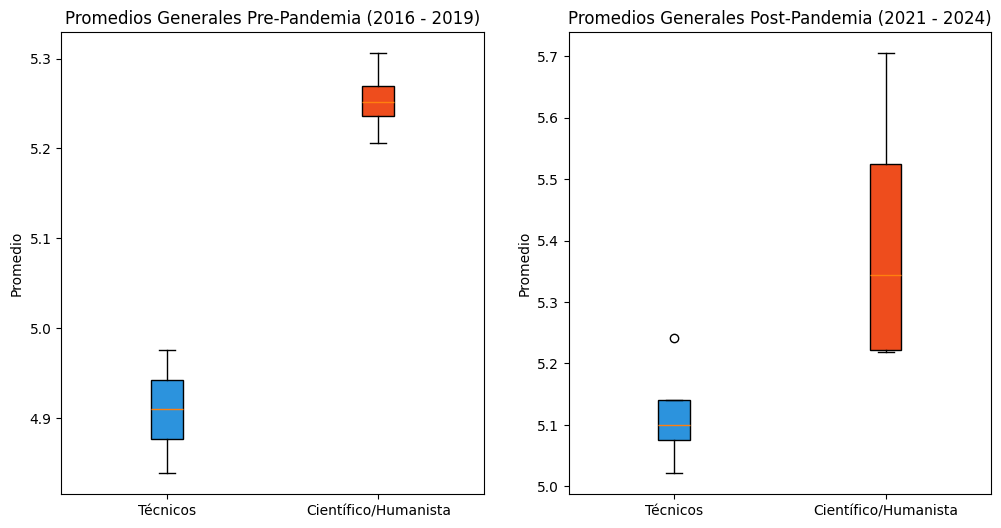

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colores = ['#2c93dd', '#ee4d1d']

axs[0].set_title('Promedios Generales Pre-Pandemia (2016 - 2019)')
axs[0].set_ylabel('Promedio')
bplot1 = axs[0].boxplot(
    [promedios_tec[:4], promedios_hc[:4]],
    patch_artist=True,
    positions=[1, 2]
)
for patch, color in zip(bplot1['boxes'], colores):
    patch.set_facecolor(color)
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['Técnicos', 'Científico/Humanista'])

axs[1].set_title('Promedios Generales Post-Pandemia (2021 - 2024)')
bplot2 = axs[1].boxplot(
    [promedios_tec[5:], promedios_hc[5:]],
    patch_artist=True,
    positions=[1, 2]
)
for patch, color in zip(bplot2['boxes'], colores):
    patch.set_facecolor(color)
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['Técnicos', 'Científico/Humanista'])
axs[1].set_ylabel('Promedio')

plt.show()

## Tabla comparativa de extremos

In [17]:
min_tec_pre = min(promedios_tec[:4]).round(2)
max_tec_pre = max(promedios_tec[:4]).round(2)
min_hc_pre = min(promedios_hc[:4]).round(2)
max_hc_pre = max(promedios_hc[:4]).round(2)

min_tec_post = min(promedios_tec[5:]).round(2)
max_tec_post = max(promedios_tec[5:]).round(2)
min_hc_post = min(promedios_hc[5:]).round(2)
max_hc_post = max(promedios_hc[5:]).round(2)

arrays = [
    ['Pre-Pandemia'] * 4 + ['Post-Pandemia'] * 4,
    ['Técnico', 'Técnico', 'Científico/Humanista', 'Científico/Humanista'] * 2, 
    ['Min', 'Max', 'Min', 'Max'] * 2  
]
tuplas = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuplas, names=['Periodo', 'Tipo', 'Promedio min/max'])

data = [
    min_tec_pre, max_tec_pre, min_hc_pre, max_hc_pre,
    min_tec_post, max_tec_post, min_hc_post, max_hc_post
]

tabla = pd.DataFrame(data=data, index=index)
tabla.columns = ['Tabla comparativa de extremos']
tabla

Tabla comparativa de extremos
Periodo       Tipo                 Promedio min/max                               
Pre-Pandemia  Técnico              Min                                        4.84
                                   Max                                        4.98
              Científico/Humanista Min                                        5.21
                                   Max                                        5.31
Post-Pandemia Técnico              Min                                        5.02
                                   Max                                        5.24
              Científico/Humanista Min                                        5.22
                                   Max                                        5.70

- (Se observa aumento en los valores min y max, no sé como explicarlo tonces delego el trabajo del argumento, perdones djsndkjs :c)

# Grafico de correlación

<Axes: >

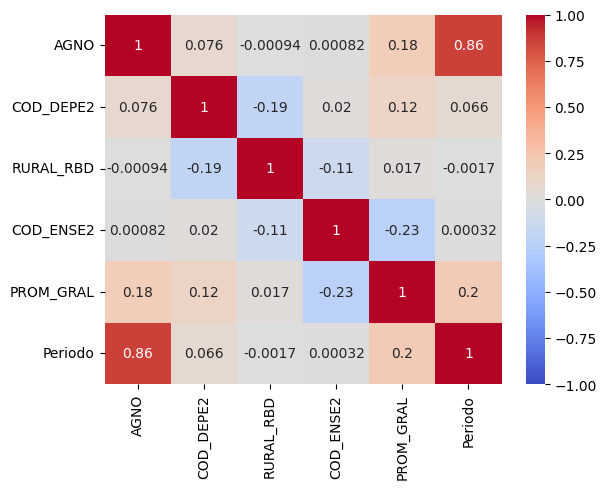

In [70]:
import seaborn as sns

df_correlaciones = df_correlaciones[df_correlaciones["PROM_GRAL"] != 0]
df_correlaciones['Periodo'] = np.where(df_correlaciones['AGNO'] < 2020, 0, 1) # 0 = pre-pandemia, 1 = post-pandemia
promedios = 'PROM_GRAL'
corrs = df_correlaciones.corr(method='spearman')
sns.heatmap(corrs, annot=True, cmap='coolwarm', vmax=1, vmin=-1)


In [31]:
ptj_17 = pd.read_csv(os.path.join("2017-2024","2017","P.D.A-2017-RENDICIÓN-REGULAR","Rinden_Admisión2017", "ArchivoC_Adm2017.csv"), sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA'])
ptj_18 = pd.read_csv(os.path.join("2017-2024","2018","P.D.A-2018-RENDICIÓN-REGULAR","Rinden_Admisión2018", "ArchivoC_Adm2018.csv"), sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA_EDUCACIONAL'])
ptj_19 = pd.read_csv(os.path.join("2017-2024","2019","P.D.A-2019-RENDICIÓN-REGULAR","Rinden_Admisión2019", "ArchivoC_Adm2019.csv"), sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA_EDUCACIONAL'])
ptj_20 = pd.read_csv(os.path.join("2017-2024","2020","P.D.A-2020-RENDICIÓN-REGULAR","Rinden_Admisión2020", "ArchivoC_Adm2020.csv"), sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA_EDUCACIONAL'])
ptj_21 = pd.read_csv(os.path.join("2017-2024","2021","P.D.A-2021-RENDICIÓN-REGULAR","Rinden_Admisión2021", "ArchivoC_Adm2021.csv"), sep=";", usecols=['CLEC_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA_EDUCACIONAL'])
ptj_22 = pd.read_csv(os.path.join("2017-2024","2022","P.D.A-2022-RENDICIÓN-REGULAR","Rinden_Admisión2022", "ArchivoC_Adm2022.csv"), sep=";", usecols=['CLEC_ACTUAL', 'MATE_ACTUAL', 
                                                                                                                                            'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA',
                                                                                                                                            'RAMA_EDUCACIONAL'])
ptj_23 = pd.read_csv(os.path.join("2017-2024","2023","P.D.A-2023-RENDICIÓN-INVIERNO-REGULAR","Rinden_Admisión2023", "ArchivoC_Adm2023.csv"), sep=";", usecols=['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 
                                                                                                                                            'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL',
                                                                                                                                            'CLEC_INV_ACTUAL', 'MATE_INV_ACTUAL', 
                                                                                                                                            'HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL',
                                                                                                                                            'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_24 = pd.read_csv(os.path.join("2017-2024","2024","P.D.A-2024-RENDICIÓN-INVIERNO-REGULAR","Rinden_Admisión2024", "ArchivoC_Adm2024.csv"), sep=";", usecols=['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 
                                                                                                                                            'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL',
                                                                                                                                            'CLEC_INV_ACTUAL', 'MATE1_INV_ACTUAL', 
                                                                                                                                            'MATE2_INV_ACTUAL','HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL',
                                                                                                                                            'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])

In [39]:
ptj_17 = ptj_17.rename(columns={'RAMA': 'RAMA_EDUCACIONAL'})
ptj_17 = ptj_17.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_18 = ptj_18.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_19 = ptj_19.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_20 = ptj_20.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_21 = ptj_21.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_22 = ptj_22.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_23 = ptj_23.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_24 = ptj_24.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])

In [ ]:
ptjes = [ptj_17, ptj_18, ptj_19, ptj_20, ptj_21, ptj_22, ptj_23, ptj_24]
for df in ptjes:
    df['RAMA_EDUCACIONAL'] = df['RAMA_EDUCACIONAL'].apply(lambda x: 0 if str(x).startswith('T') else 1) # 0 = Tecnico, 1 = Humanista/Cientifico

In [54]:
cols = ['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL']

def promedio_sin_ceros(row, cols):
    valores = row[cols]
    suma = valores[valores != 0].sum()
    cuenta = (valores != 0).sum()                          # Casilla pesada de correr :c
    return suma / cuenta if cuenta > 0 else None  

for df in ptjes[:4]:
    df['PROMEDIO_PPTES'] = df.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
    df['PROMEDIO_PPTES'] = df['PROMEDIO_PPTES'].round(3)

In [ ]:
cols = ['CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL']

ptj_21['PROMEDIO_PPTES'] = ptj_21.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_22['PROMEDIO_PPTES'] = ptj_22.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_21['PROMEDIO_PPTES'] = ptj_21['PROMEDIO_PPTES'].round(3)
ptj_22['PROMEDIO_PPTES'] = ptj_22['PROMEDIO_PPTES'].round(3)

In [56]:
cols = ['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL','CLEC_INV_ACTUAL', 'MATE_INV_ACTUAL', 
        'HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'] 

ptj_23['PROMEDIO_PPTES'] = ptj_23.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_23['PROMEDIO_PPTES'] = ptj_23['PROMEDIO_PPTES'].round(3)

cols = ['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL','CLEC_INV_ACTUAL', 'MATE1_INV_ACTUAL', 
        'MATE2_INV_ACTUAL','HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL']

ptj_24['PROMEDIO_PPTES'] = ptj_24.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_24['PROMEDIO_PPTES'] = ptj_24['PROMEDIO_PPTES'].round(3)

<Axes: >

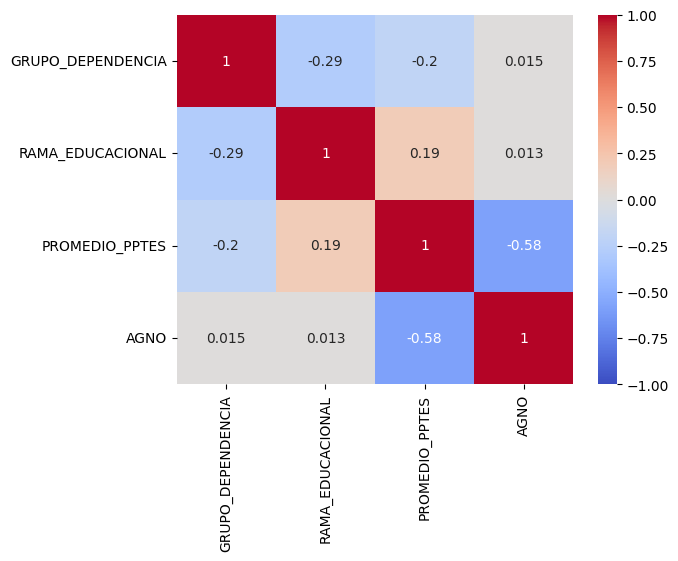

In [69]:
cols_mantenidas = ['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL', 'PROMEDIO_PPTES']
agnos = list(range(2017, 2025))
df_corr = pd.concat(
    [
        df[cols_mantenidas].assign(AGNO=year)
        for year, df in zip(agnos, ptjes)
    ],
    ignore_index=True
)
corr = df_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)

In [74]:
df_corr.head()

,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,PROMEDIO_PPTES,AGNO
0,2.0,1,499.333,2017
1,3.0,1,576.667,2017
2,3.0,0,418.500,2017
3,2.0,1,513.000,2017
4,2.0,1,481.333,2017
